<a href="https://colab.research.google.com/github/girijaRA/BIA-DS/blob/main/Sentimental_Analysis_for_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
files.upload()


Saving test.csv to test.csv


{'test.csv': b'textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km\xb2),Density (P/Km\xb2)\r\nf87dea47db,Last session of the day  http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860,60\r\n96d74cb729, Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).,positive,noon,21-30,Albania,2877797,27400,105\r\neee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044,2381740,18\r\n01082688c6, happy bday!,positive,morning,46-60,Andorra,77265,470,164\r\n33987a8ee5, http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700,26\r\n726e501993, that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929,440,223\r\n261932614e,I THINK EVERYONE HATES ME ON HERE   lol,negative,morning,0-20,Argentina,45195774,2736690,17\r\nafa11da83f," soooooo wish i could, but im in school and myspace i

In [31]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [20]:
data = pd.read_csv("/content/test.csv", encoding='latin1')


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [85]:
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),clean_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http //twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely -- sky...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http //twitpic.com/4w75p like


In [26]:
data.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**DATA PREPROCESSING**

In [47]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Removing punctuation and stop words
        stop_words = set(stopwords.words('english') + list(string.punctuation))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        return ' '.join(filtered_tokens)
    else:
        return ''  # Return empty string for missing values
# Apply preprocessing to the 'text' column
data['clean_text'] = data['text'].astype(str).apply(preprocess_text)


**DATA SPLITTING**

In [48]:
from sklearn.model_selection import train_test_split

X = data['clean_text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**VECTORIZATION**

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


In [53]:
from textblob import TextBlob

In [56]:
# Split the data into features (X) and target (y)
X = data['text']
y = data['sentiment']

In [57]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Define different models
logistic_model = LogisticRegression()
naive_bayes_model = MultinomialNB()
random_forest_model = RandomForestClassifier()

In [62]:

# Create a pipeline for each model
logistic_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', logistic_model)])
naive_bayes_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', naive_bayes_model)])
random_forest_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', random_forest_model)])


In [64]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

1023
258


In [65]:
X_train = X_train.fillna('')
X_test = X_test.fillna('')

In [66]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [68]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define different models
logistic_model = LogisticRegression()
naive_bayes_model = MultinomialNB()
random_forest_model = RandomForestClassifier()

# Create a pipeline for each model
logistic_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', logistic_model)])
naive_bayes_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', naive_bayes_model)])
random_forest_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', random_forest_model)])



In [70]:
# Word cloud (bag of words)
positive_text = ' '.join(data[data['sentiment'] == 'positive']['text'])
negative_text = ' '.join(data[data['sentiment'] == 'negative']['text'])

In [72]:
from wordcloud import WordCloud

**POSITIVE AND NEGATIVE REVIEWS**

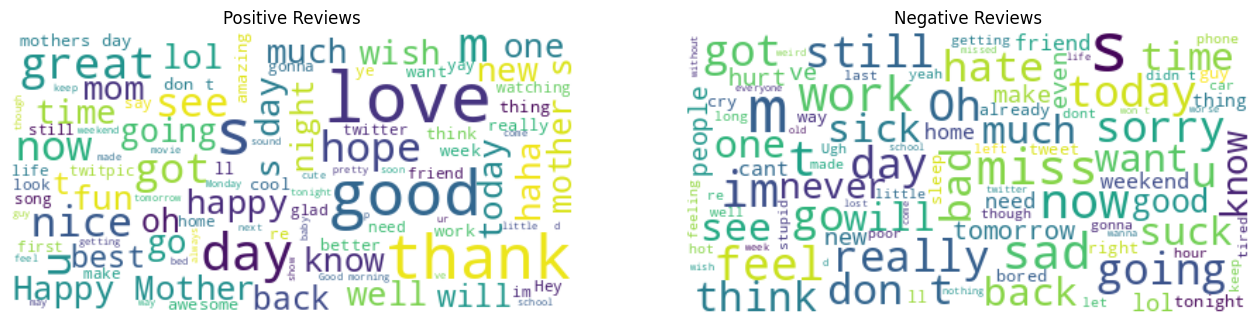

In [73]:

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Reviews')

plt.show()

**PIE CHART**

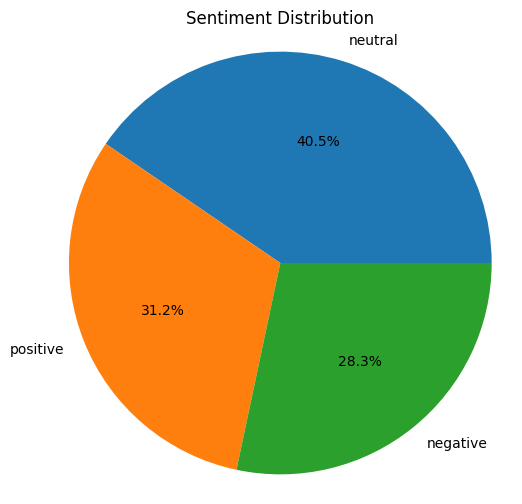

In [77]:
# Sentiment distribution (pie chart)
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

**BAR CHART**

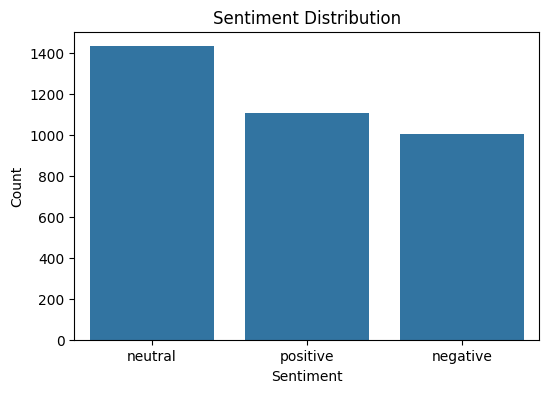

In [78]:
# Sentiment distribution (bar chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

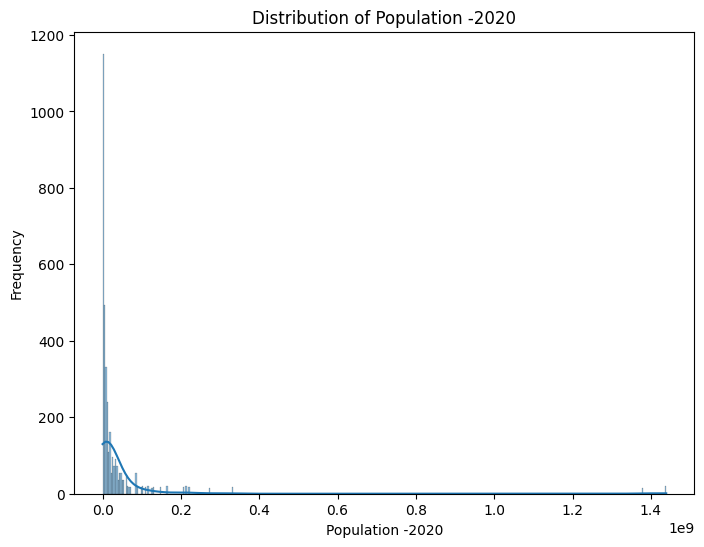

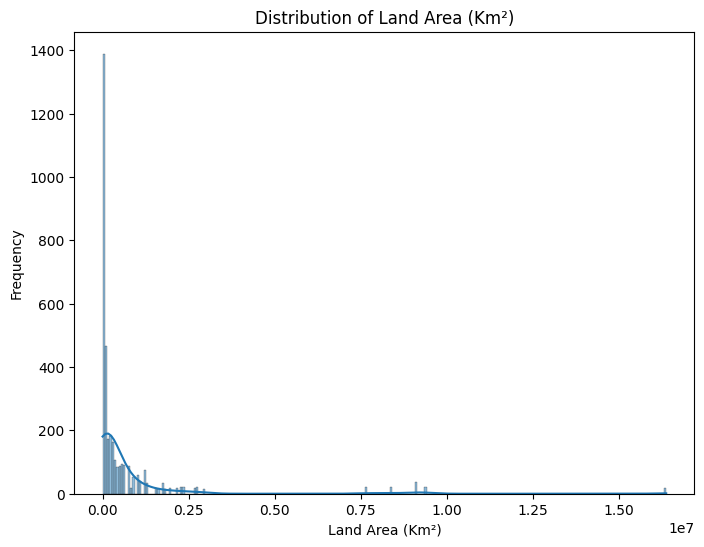

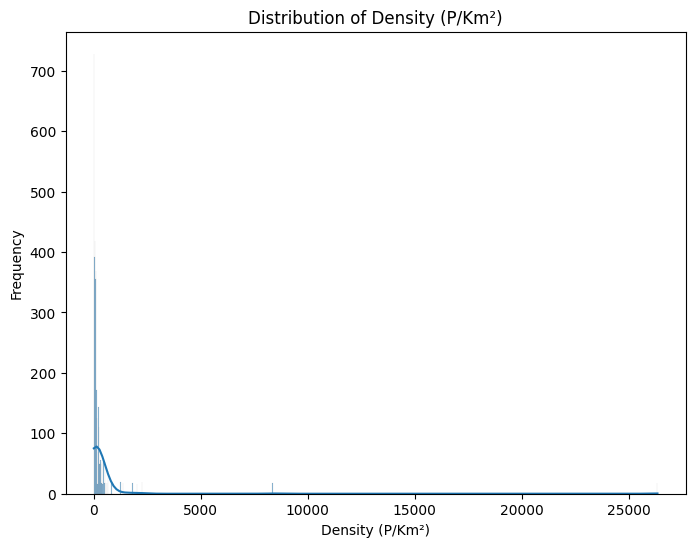

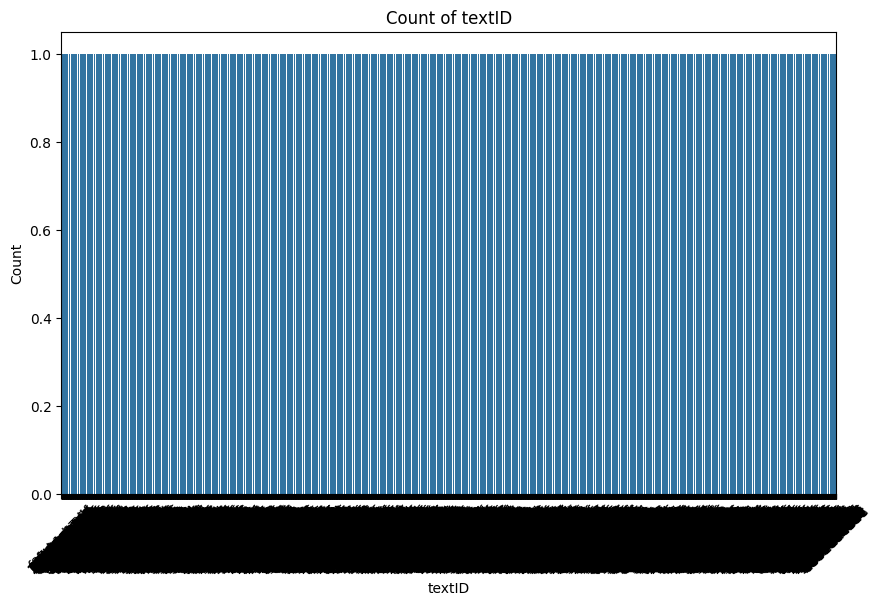

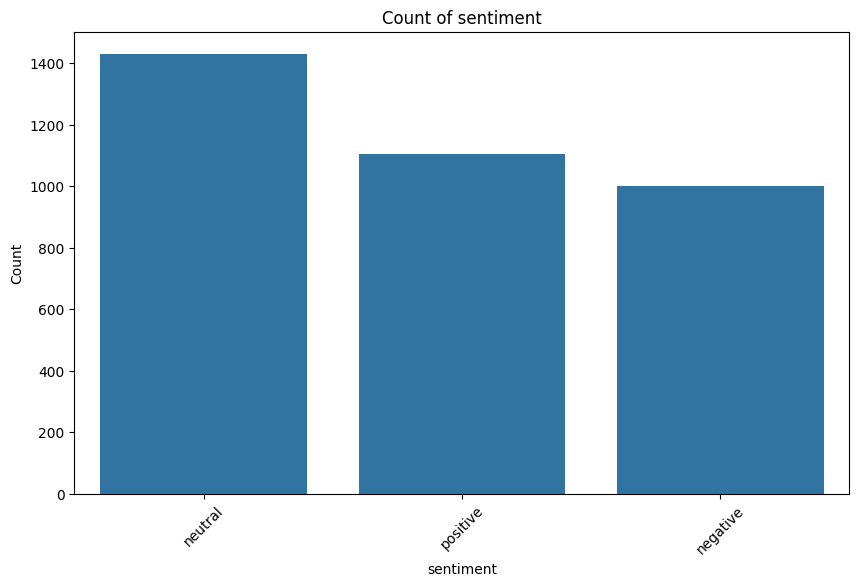

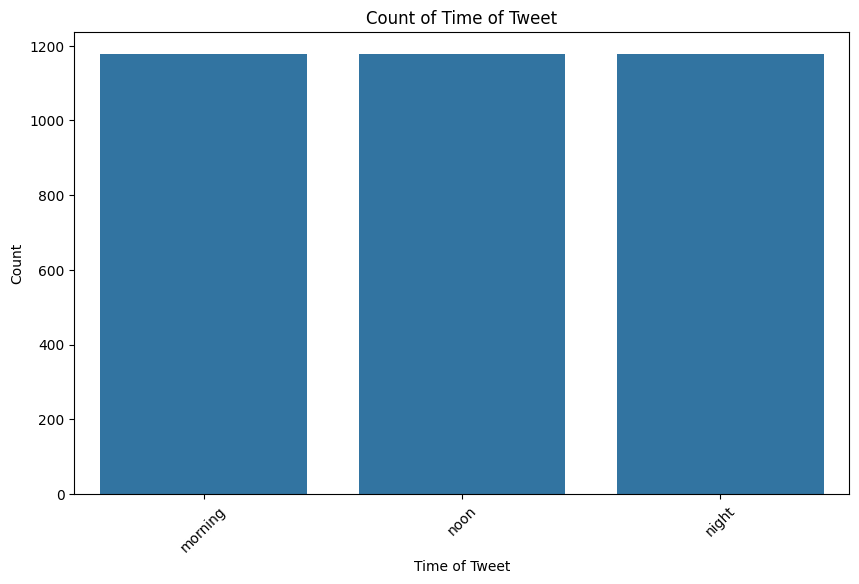

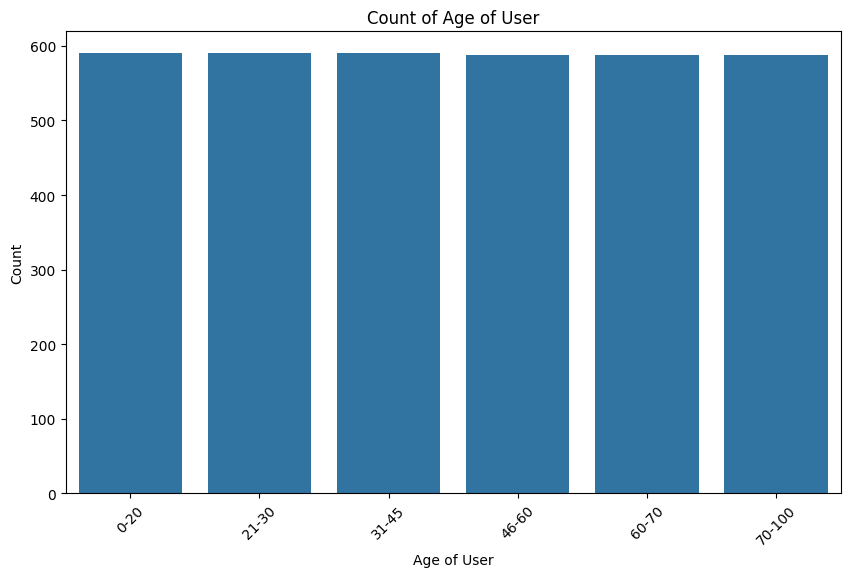

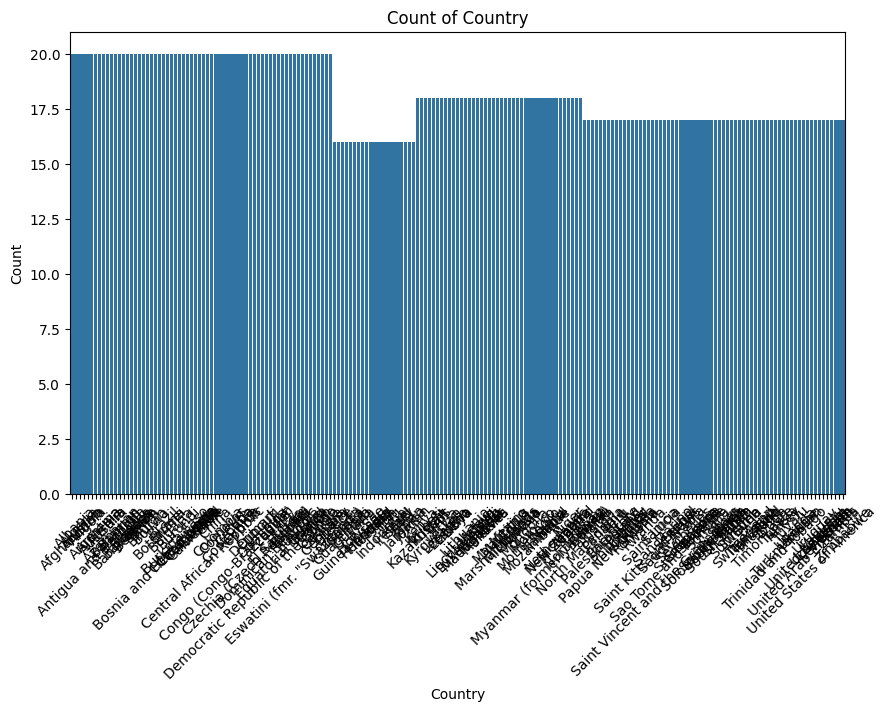

KeyError: 'predicted_sentiment'

In [86]:
# EDA Visualizations for numerical columns
numerical_columns = ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# EDA Visualizations for categorical columns
categorical_columns = ['textID', 'sentiment', 'Time of Tweet', 'Age of User', 'Country']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Calculate accuracy for the 'sentiment' column
accuracy = accuracy_score(data['sentiment'], data['predicted_sentiment'])  # Assuming you have a 'predicted_sentiment' column
print("Accuracy for sentiment column:", accuracy)


In [88]:
print(data.columns)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)',
       'clean_text'],
      dtype='object')


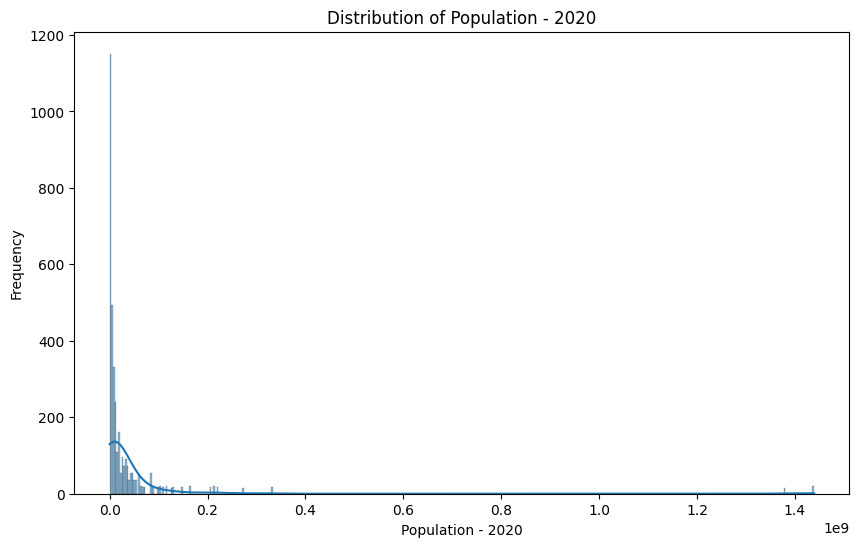

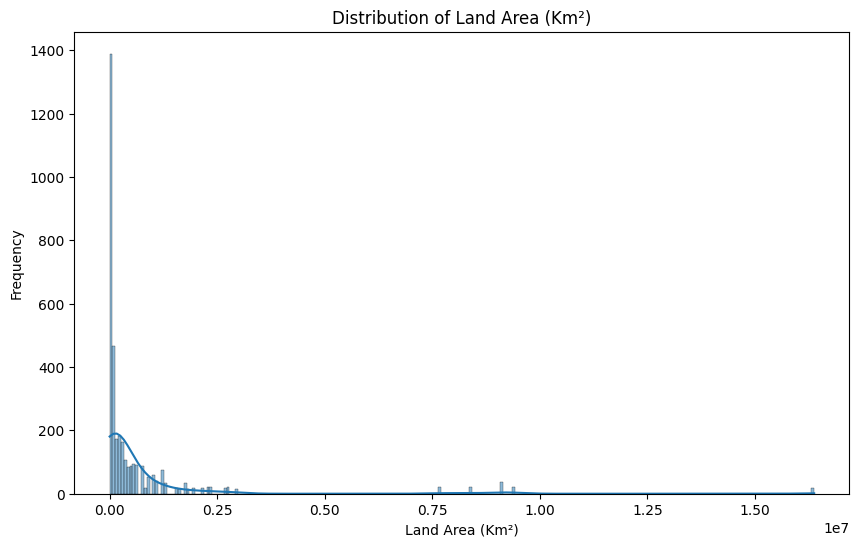

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Population -2020', kde=True)
plt.title('Distribution of Population - 2020')
plt.xlabel('Population - 2020')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Land Area (Km²)', kde=True)
plt.title('Distribution of Land Area (Km²)')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Frequency')
plt.show()


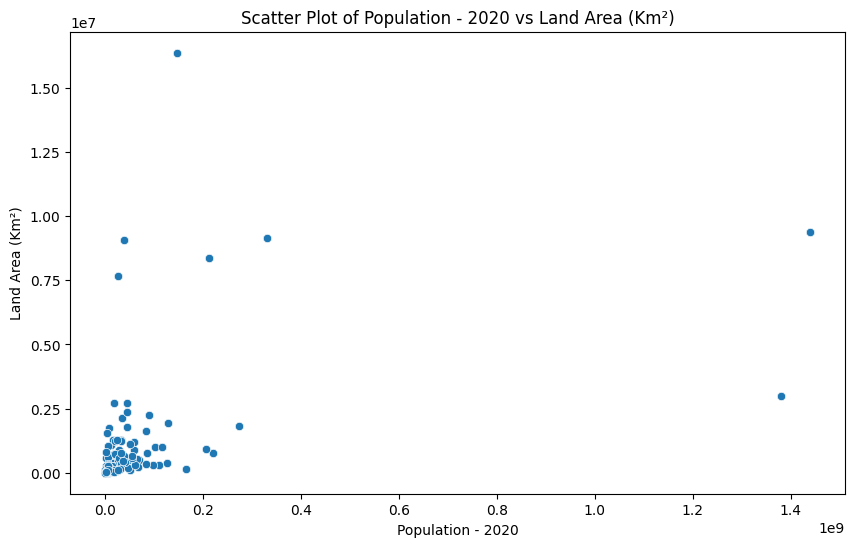

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Population -2020', y='Land Area (Km²)')
plt.title('Scatter Plot of Population - 2020 vs Land Area (Km²)')
plt.xlabel('Population - 2020')
plt.ylabel('Land Area (Km²)')
plt.show()


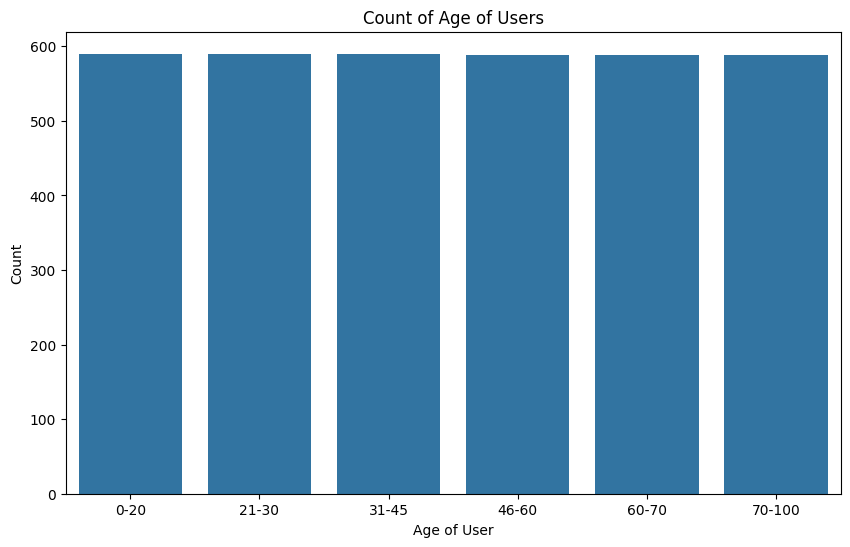

In [92]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age of User')
plt.title('Count of Age of Users')
plt.xlabel('Age of User')
plt.ylabel('Count')
plt.show()


<ipython-input-93-afc2d580814d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


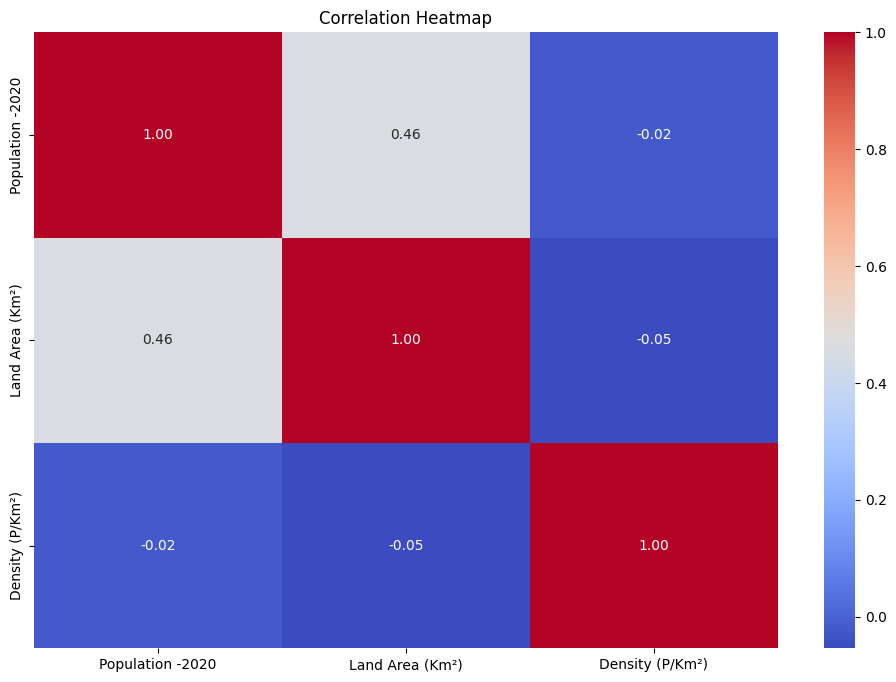

In [93]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


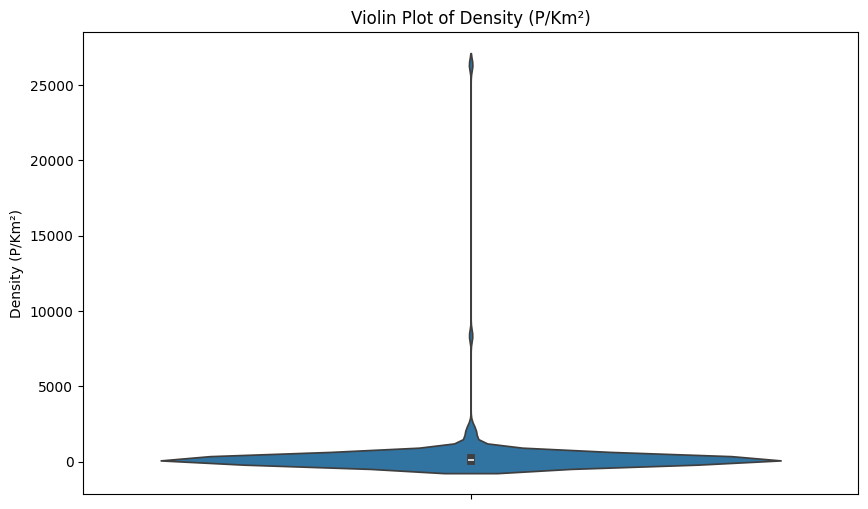

In [96]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='Density (P/Km²)')
plt.title('Violin Plot of Density (P/Km²)')
plt.ylabel('Density (P/Km²)')
plt.show()
